In [151]:
import json
from pathlib import Path
import pandas as pd
from razdel import sentenize
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

## Load data

In [6]:
with open('data/tp.json') as report:
    tp = json.load(report)
#     print(tp)

In [7]:
with open('data/tn.json') as report3:
    tn = json.load(report3)
#     print(tp)

In [8]:
with open('data/test_data.json') as report2:
    test_data = json.load(report2)

In [11]:
l = []
for i in range(len(test_data)):
#     test_data[i].keys()
    if test_data[i].keys() not in l:
        l.append(test_data[i].keys())

[dict_keys(['title', 'text'])]

## Dataset creation

In [16]:
df1 = pd.DataFrame()

df1['sentence'] = tn
df1['labels'] = 0

In [18]:
df2 = pd.DataFrame()

df2['sentence'] = tp
df2['labels'] = 1

In [25]:
df = pd.concat([df1,df2]).reset_index(drop=True)
df.head()

In [27]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,sentence,labels
0,В доме зарегистрировано 80 участников долевого...,0
1,Срыв сроков строительства зоопарка оценили в 1...,1
2,На сегодняшний день готовность составляет лишь...,0
3,А вот кто понесёт ответственность за срыв срок...,1
4,ЗОЛОТОЙ КВАДРАТНЫЙ МЕТР – Первый замначальника...,0


In [29]:
df.shape

(1669, 2)

In [49]:
df.to_csv('data/train_sentences.csv', index=False)

In [128]:
titles = [i['title'] for i in test_data]

In [129]:
titles_df = pd.DataFrame(titles, columns=['title'])
titles_df.head()

,title
0,Уралкуз” изготовил рекордное количество осей
1,Отключение Ирана от интернета выявило сильные ...
2,Во Владивостоке количество наружной рекламы до...
3,"ФУТБОЛ-Месси получил рекордный шестой ""Золотой..."
4,«ОРУ под напряжением Луны»: фото амурчанина по...


In [48]:
titles_df.to_csv('data/test_titles.csv', index=False)

## For all sentences processing

In [134]:
# test_data_new = {}
list_titles = []
list_sent = []
for new in test_data:
    title = new['title']
#     sent_list = []
    for obj in list(sentenize(new['text'])):
#         sent_list.append(list(obj)[2])
        list_titles.append(title)
        list_sent.append(list(obj)[2])
#     test_data_new[title] = sent_list

In [168]:
all_sent_df = pd.DataFrame(columns=['title', 'sentence'])
all_sent_df['title'] = list_titles
all_sent_df['sentence'] = list_sent
all_sent_df.head()

,title,sentence
0,Уралкуз” изготовил рекордное количество осей,"ПАО ""Уральская кузница"" (входит в Группу ""Мече..."
1,Уралкуз” изготовил рекордное количество осей,"""Уралкуз"" в октябре 2019 года поставил абсолют..."
2,Уралкуз” изготовил рекордное количество осей,За 10 месяцев 2019 года отгружено более 12 тыс...
3,Уралкуз” изготовил рекордное количество осей,"""Мы побили рекорд 2013 года."
4,Уралкуз” изготовил рекордное количество осей,"Тогда за весь год мы отгрузили почти 11,2 тыс...."


In [142]:
all_sent_df.to_csv('data/test_all_sentences.csv', index=False)

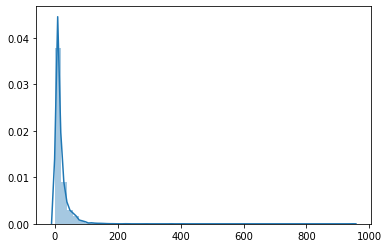

In [152]:
sns.distplot(all_sent_df.groupby('title').size().values)